In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
datasets = {
    "illness": "dataset/national_illness.csv",
    "traffic": "dataset/traffic.csv",
    "electricity": "dataset/electricity.csv",
    "weather": "dataset/weather.csv",
    "exchange_rate": "dataset/electricity.csv"}

In [7]:
for i, (name, path) in enumerate(datasets.items()):
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)

    df = df.resample('D').mean()
    df.dropna(inplace=True)

    target_col = df.columns[-1]
    result = seasonal_decompose(df[target_col], model='additive', period=7)  

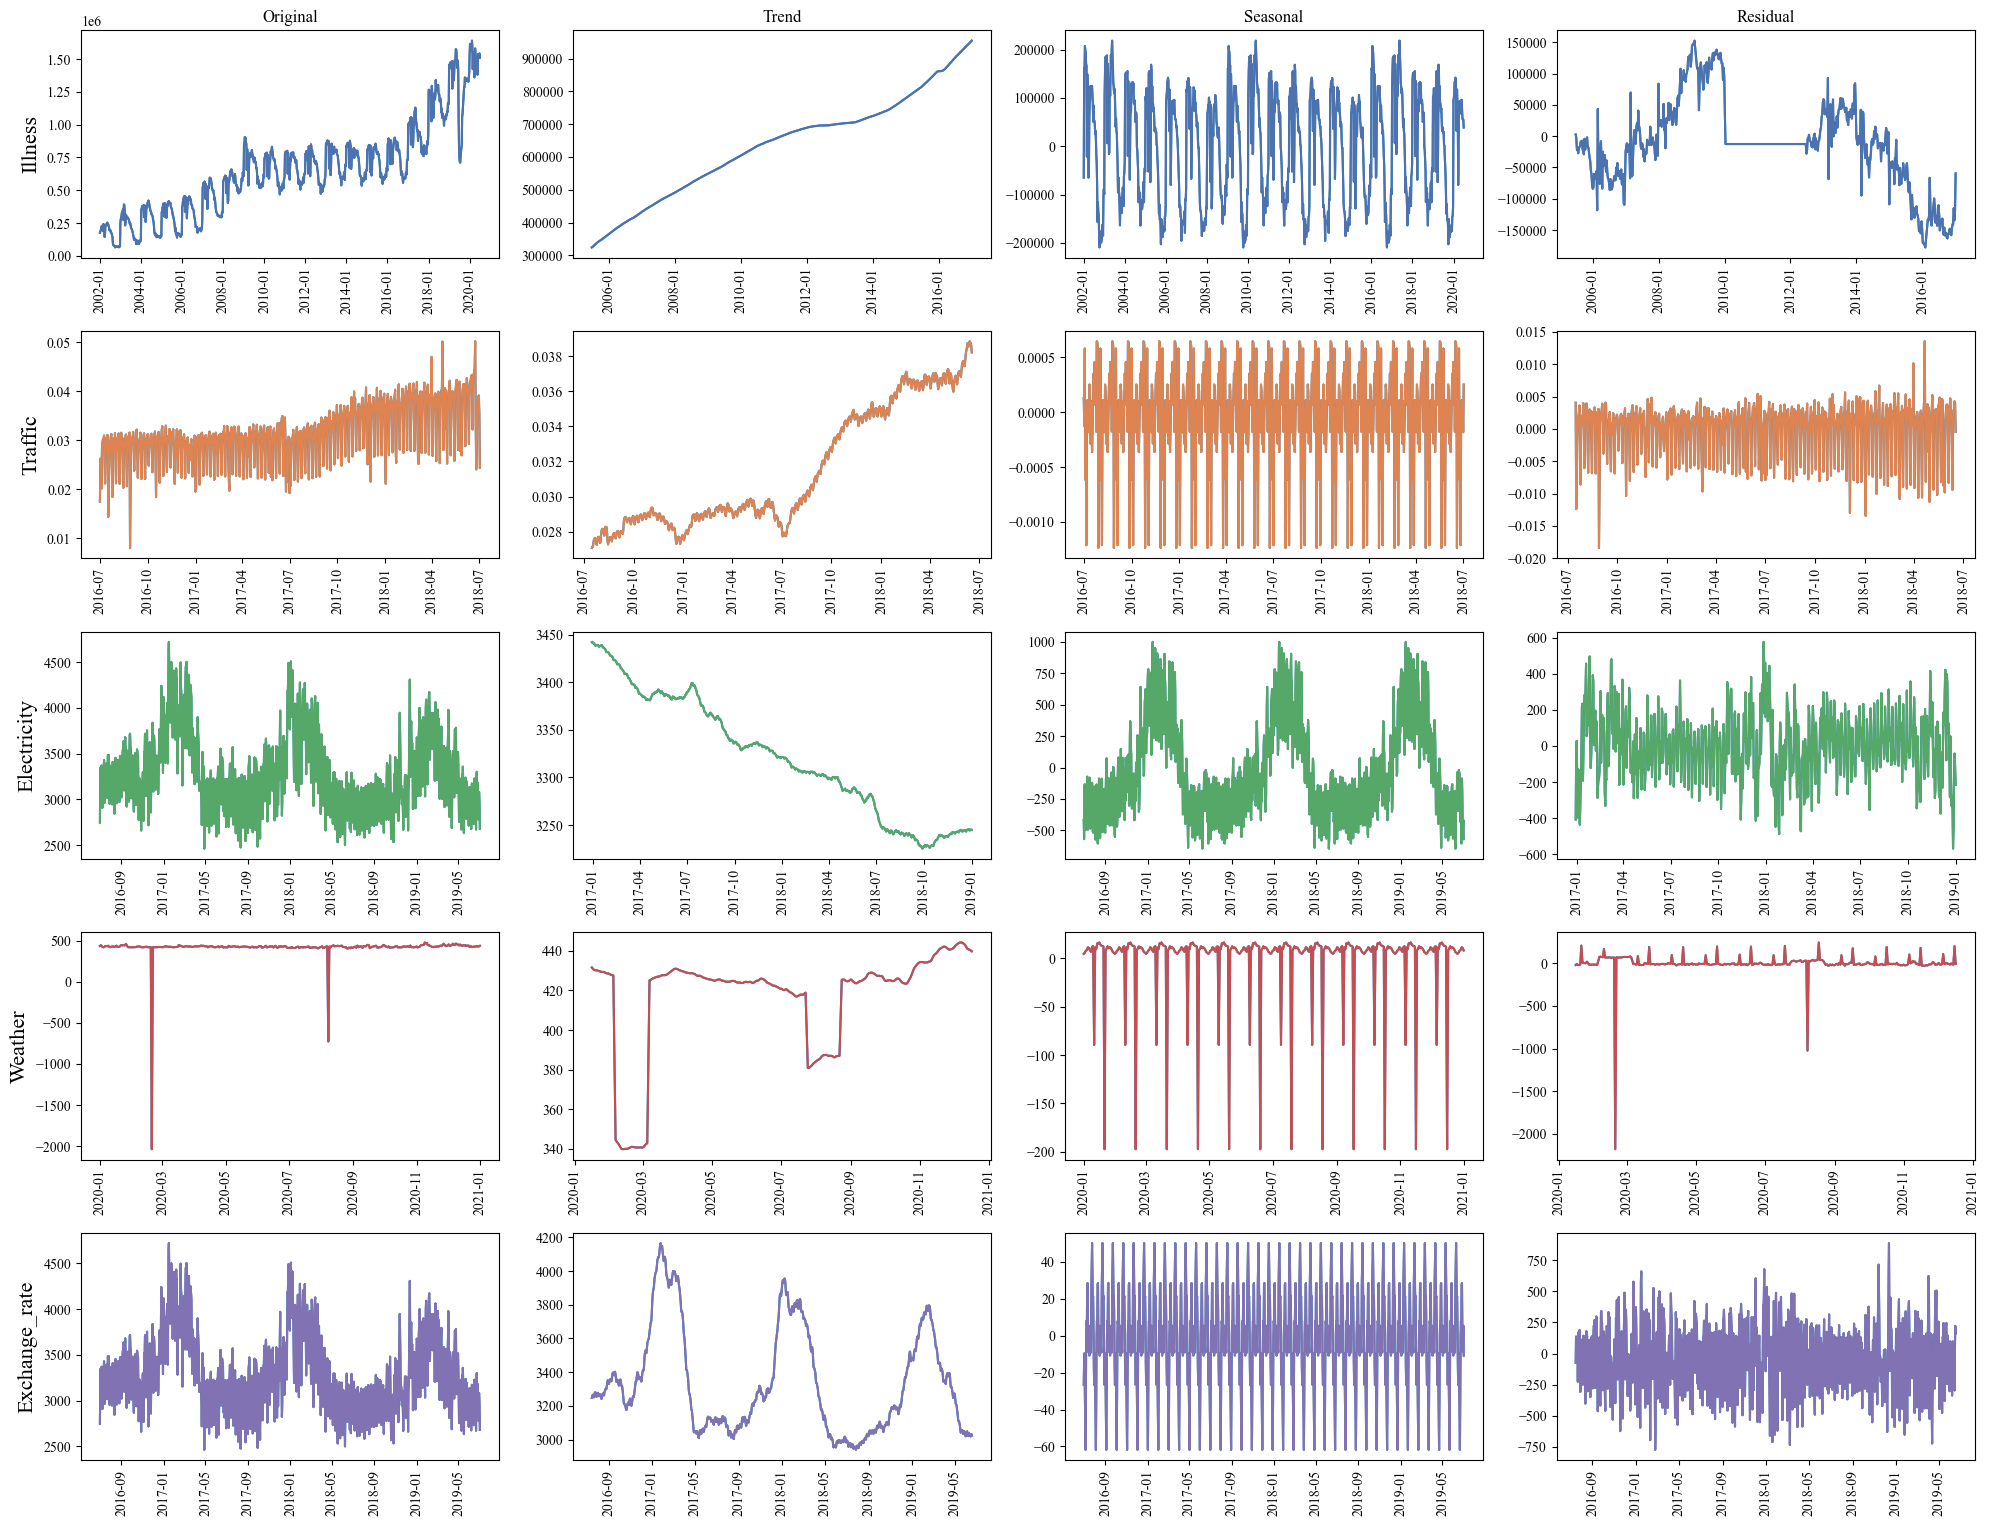

In [8]:
plt.rcParams['font.family'] = 'Times New Roman'

periods = {
    "illness": 365,
    "traffic": 30,
    "electricity": 365,
    "weather": 30,
    "exchange_rate": 30}

fig, axs = plt.subplots(len(datasets), 4, figsize = (20, 16))

colors = sns.color_palette("deep", 5)

for i, (name, path) in enumerate(datasets.items()):
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)

    df = df.resample("D").mean()
    df.dropna(inplace=True)

    target_col = df.columns[-1]
    series = df[target_col]

    result = seasonal_decompose(series, model = 'additive', period = periods[name])

    axs[i, 0].plot(series)
    axs[i, 0].set_ylabel(name.capitalize(), fontsize = 16, fontname = 'Times New Roman')
    if i == 0:
        axs[i, 0].set_title("Original")

    axs[i, 1].plot(result.trend)
    if i == 0:
        axs[i, 1].set_title("Trend")

    axs[i, 2].plot(result.seasonal)
    if i == 0:
        axs[i, 2].set_title("Seasonal")

    axs[i, 3].plot(result.resid)
    if i == 0:
        axs[i, 3].set_title("Residual")
    
    for j in range(4):
        axs[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axs[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[i, j].tick_params(axis='x', rotation=90)
    
    color = colors[i]

    axs[i, 0].plot(series, color=color)
    axs[i, 1].plot(result.trend, color=color)
    axs[i, 2].plot(result.seasonal, color=color)
    axs[i, 3].plot(result.resid, color=color)
    
for ax_row in axs:
    for ax in ax_row:
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontname('Times New Roman')
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
